# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Não Supervisionada
## Projeto 3: Criando Segmentos de Clientela

Bem-vindo ao terceiro projeto do Nanodegree Engenheiro de Machine Learning! Neste Notebook, alguns modelos de código já foram fornecidos e será seu trabalho implementar funcionalidades adicionais necessárias para completar seu projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que os blocos de código seguintes vão precisar de funcionalidades adicionais que você deve fornecer. As instruções serão fornecidas para cada seção e as especificações da implementação são marcados no bloco de código com um `'TODO'`. Leia as instruções atentamente!

Além de implementar códigos, há perguntas que você deve responder relacionadas ao projeto e a sua implementação. Cada seção na qual você responderá uma questão está precedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e forneça respostas completas nos boxes seguintes que começam com **'Resposta:'**. O envio do seu projeto será avaliado baseado nas suas respostas para cada uma das questões e na implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho do teclado **Shift+Enter**. Além disso, células de Markdown podem ser editadas ao dar duplo clique na célula para entrar no modo de edição.

## Começando

Neste projeto, você irá analisar o conjunto de dados de montantes de despesas anuais de vários clientes (reportados em *unidades monetárias*) de diversas categorias de produtos para estrutura interna. Um objetivo deste projeto é melhor descrever a variação de diferentes tipos de clientes que um distribuidor de atacado interage. Isso dará ao distribuidor discernimento sobre como melhor estruturar seu serviço de entrega de acordo com as necessidades de cada cliente.

O conjunto de dados deste projeto pode ser encontrado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). Para efeitos de projeto, os atributos `'Channel'` e `'Region'` serão excluídos da análise – que focará então nas seis categorias de produtos registrados para clientes.

Execute o bloco de código abaixo para carregar o conjunto de dados de clientes da distribuidora, junto com algumas das bibliotecas de Python necessárias exigidos para este projeto. Você saberá que o conjunto de dados carregou com êxito se o tamanho do conjunto de dados for reportado.

In [1]:
# Importe as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
from IPython.display import display # Permite o uso de display() para DataFrames

# Importe o código sumplementar para visualização de visuals.py
import visuals as vs

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

import sys
from colors import *
from scipy.stats import norm

# Mostre matplotlib no corpo do texto (bem formatado no Notebook)
%matplotlib inline

# Carregue o conjunto de dados dos clientes da distribuidora de atacado
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print('Wholesale customers dataset has {} samples with {} features each.').format(*data.shape)
except:
    print('Dataset could not be loaded. Is the dataset missing?')

Wholesale customers dataset has {} samples with {} features each.
Dataset could not be loaded. Is the dataset missing?


/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [3]:
data.shape

(440, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


## Explorando os Dados
Nesta seção, você vai começar a explorar os dados através de visualizações e códigos para entender como cada atributo é relacionado a outros. Você vai observar descrições estatísticas do conjunto de dados, considerando a relevância de cada atributo, e selecionando alguns exemplos de pontos de dados do conjunto de dados que você vai seguir no decorrer do curso deste projeto.

Execute o bloco de código abaixo para observar as descrições estatísticas sobre o conjunto de dados. Note que o conjunto é compostos de seis categorias importantes de produtos: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'** e **'Delicatessen'** (Perecíveis, Lacticínios, Secos e Molhados, Congelados, Limpeza/Higiene, Padaria/Frios). Considere o que cada categoria representa em termos os produtos que você poderia comprar.

In [5]:
# Mostre a descrição do conjunto de dados
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
data.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

### Implementação: Selecionando Amostras
Para melhor compreensão da clientela e como seus dados vão se transformar no decorrer da análise, é melhor selecionar algumas amostras de dados de pontos e explorá-los com mais detalhes. No bloco de código abaixo, adicione **três** índices de sua escolha para a lista de `indices` que irá representar os clientes que serão acompanhados. Sugerimos que você tente diferentes conjuntos de amostras até obter clientes que variam significativamente entre si.

In [7]:
# TODO: Selecione três índices de sua escolha que você gostaria de obter como amostra do conjunto de dados
indices = [86, 125,325]

# Crie um DataFrame das amostras escolhidas
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print('Chosen samples of wholesale customers dataset:')
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,22925,73498,32114,987,20070,903
1,76237,3473,7102,16538,778,918
2,32717,16784,13626,60869,1272,5609


Text(0.5,1,'Visao da Amostra')

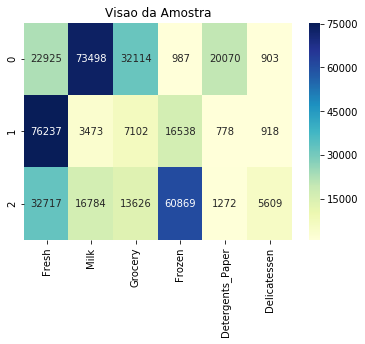

In [8]:
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(samples, cmap = 'YlGnBu', annot = True, fmt = "d", cbar = True, robust = bool)
plt.title('Visao da Amostra')

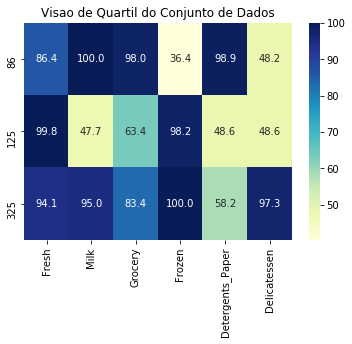

In [9]:
plt.title('Visao de Quartil do Conjunto de Dados')
quartil = 100 * data.rank(axis = 0, pct = True).iloc[indices].round(decimals = 3)
sns.heatmap(quartil, annot = True, cmap = 'YlGnBu', fmt = '.1f', robust = bool)

/Users/alessandremartins/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has

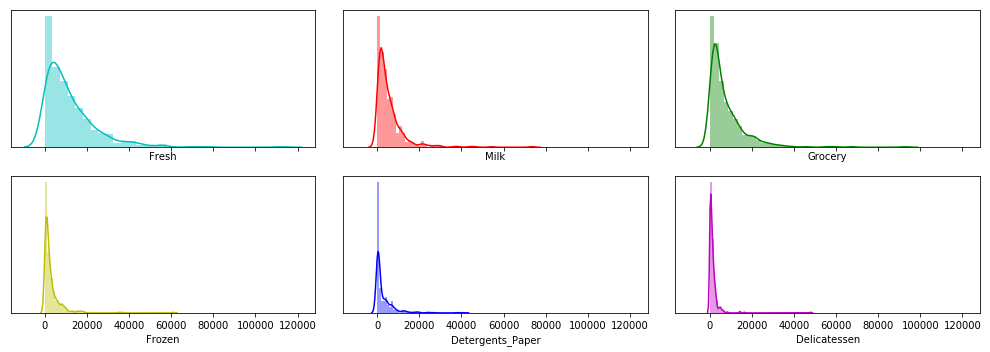

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(14, 5), sharex=True)
sns.distplot(data['Fresh'],ax=axes[0,0], color="c")
sns.distplot(data['Milk'],ax=axes[0,1], color="r")
sns.distplot(data['Grocery'],ax=axes[0,2], color="g")
sns.distplot(data['Frozen'],ax=axes[1,0], color="y")
sns.distplot(data['Detergents_Paper'],ax=axes[1,1], color="b")
sns.distplot(data['Delicatessen'],ax=axes[1,2], color="m")
plt.setp(axes, yticks=[])
plt.tight_layout()

### Questão 1
Considere que a compra total de cada categoria de produto e a descrição estatística do conjunto de dados abaixo para a sua amostra de clientes.  
 - Que tipo de estabelecimento (de cliente) cada uma das três amostras que você escolheu representa?

**Dica:** Exemplos de estabelecimentos incluem lugares como mercados, cafés e varejistas, entre outros. Evite utilizar nomes para esses padrões, como dizer *"McDonalds"* ao descrever uma amostra de cliente de restaurante.

**Resposta:**
<font style="color:blue;">
    <p>
    O cliente 86 tem um custo abaixo da mediana do conjunto de dados em Delicatessen e Congelados, por outro lado gastou acima do quartil 3 em Laticínios, Detergentes/Papeis e produtos Frescos sendo que o predominante foi os Laticínios. Aproximadamente a metade do próprio consumo é em Laticínios. Por ter baixo consumo em Delicatessen e Congelados, me leva a sugerir que é um varejista de leite e seus derivados, como: queijo, manteiga e coalhada. Entretanto, esse cliente compra deliberadamente produtos de Mercearia e Frios, que podem ser usados na produção e embalagem de doces, sorvetes, iogurtes e outros. Pode ser um restaurante que serve quitutes a uma soverteria com fabricação própria ou uma padaria.
    </p>
    <p>
    O consumo do cliente 125 é predominantemente de alimentos Frescos e também consume Congelados acima do quartil 3 e acima do quartil 2 consome produtos de Mercearia. Me leva a sugerir que é um restaurante ou um café pelo consumo de produtos frescos e congelados.
    </p>
    <p>
    Acredito que o cliente 325 seja um restaurante ou um café regional. Pois tem um custo no topo do quartil 3 em Congelados e pulveriza as demais categorias de produtos no mesmo quartil com exceção dos produtos de Detergentes/Papeis que ficam um pouco acima da mediana do conjunto de dados. 
    </p>
</font>

### Implementação: Relevância do Atributo
Um pensamento interessante a se considerar é se um (ou mais) das seis categorias de produto são na verdade relevantes para entender a compra do cliente. Dito isso, é possível determinar se o cliente que comprou certa quantidade de uma categoria de produto vai necessariamente comprar outra quantidade proporcional de outra categoria de produtos? Nós podemos determinar facilmente ao treinar uma aprendizagem não supervisionada de regressão em um conjunto de dados com um atributo removido e então pontuar quão bem o modelo pode prever o atributo removido.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Atribuir `new_data` a uma cópia dos dados ao remover o atributo da sua escolha utilizando a função `DataFrame.drop`.
 - Utilizar `sklearn.cross_validation.train_test_split` para dividir o conjunto de dados em conjuntos de treinamento e teste.
   - Utilizar o atributo removido como seu rótulo alvo. Estabelecer um `test_size` de `0.25` e estebeleça um `random_state`.
 - Importar uma árvore de decisão regressora, estabelecer um `random_state` e ajustar o aprendiz nos dados de treinamento.
 - Reportar a pontuação da previsão do conjunto de teste utilizando a função regressora `score`.

In [11]:
def categoria_score(categoria):
    # TODO: Fazer uma cópia do DataFrame utilizando a função 'drop' para soltar o atributo dado
    new_data = data.drop([categoria], axis = 1, inplace = False)

    # TODO: Dividir os dados em conjuntos de treinamento e teste utilizando o atributo dado como o alvo
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[categoria], 
                                                        test_size = 0.25, random_state = 33)

    # TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
    regressor = DecisionTreeRegressor(random_state = 33).fit(X_train, y_train)

    # TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
    score = regressor.score(X_test, y_test)
    print('O score de {} é {}'.format(categoria, score))

categorias = list(data.columns)

for c in categorias:
    categoria_score(c)

O score de Fresh é -0.7759120744512906
O score de Milk é 0.28183362913203236
O score de Grocery é 0.41478648965272985
O score de Frozen é -0.7430890235061527
O score de Detergents_Paper é 0.6538599336828923
O score de Delicatessen é -17.883606617025727


### Questão 2
- Qual atributo você tentou prever?
- Qual foi a pontuação da previsão reportada?
- Esse atributo é necessário para identificar os hábitos de compra dos clientes?

**Dica:** O coeficiente de determinação, `R^2`, é pontuado entre 0 e 1, sendo 1 o ajuste perfeito. Um `R^2` negativo indica que o modelo falhou em ajustar os dados. Se você obter um score baixo para um atributo em particular, isso nos faz acreditar que aquele ponto de atributo é difícil de ser previsto utilizando outros atributos, sendo assim um atributo importante quando considerarmos a relevância.

**Resposta:**
<font style="color:blue;">
    <p>
        A principio eu escolhi Delicatessen, como seu R^2 deu negativo pensei em fazer com Detergentes/Papeis. O R^2 Detergentes/Papeis foi pouco alto. Por isso alterei o algoritmo para exibir todos.</p>
    <p>
        O R^2 das categorias de produtos Frescos, Congelados e Delicatessen ficaram negativos indicando que o modelo de regressão de arvore de decisão falhou ao dataset ou são falsos negativos, logo esses resultados são críticos. Então fiz uma implementação para ver o R^2 de todos os atributos e poder fazer comparações. Os R^2 de Detergentes/Papeis é bom, sendo os mais fáceis de se correlacionar com as demais categorias, não é tão relevante para identificar os hábitos dos consumidores. Acredito que Laticínios quando removido é o atributo mais importantes para prever os hábitos dos clientes.</p>
</font>

### Visualizando a Distribuição de Atributos
Para entender melhor o conjunto de dados, você pode construir uma matriz de dispersão de cada um dos seis atributos dos produtos presentes nos dados. Se você perceber que o atributo que você tentou prever acima é relevante para identificar um cliente específico, então a matriz de dispersão abaixo pode não mostrar nenhuma relação entre o atributo e os outros. Da mesma forma, se você acredita que o atributo não é relevante para identificar um cliente específico, a matriz de dispersão pode mostrar uma relação entre aquele e outros atributos dos dados. Execute o bloco de código abaixo para produzir uma matriz de dispersão.

/Users/alessandremartins/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


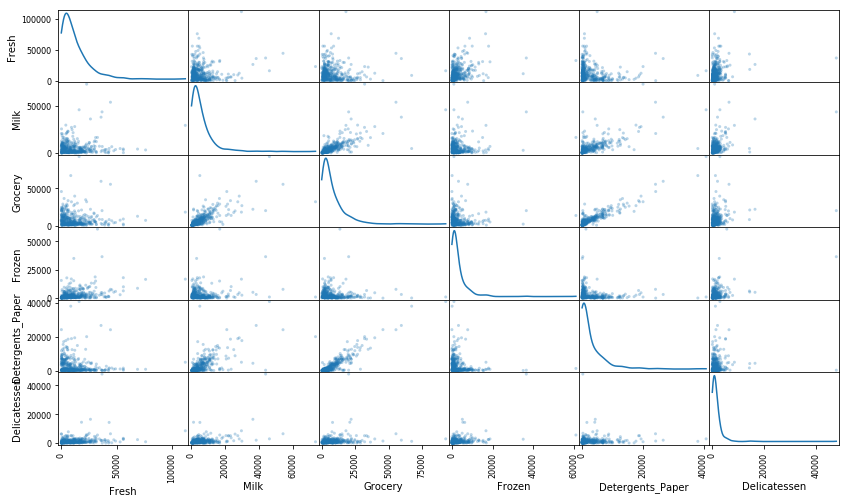

In [12]:
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Questão 3:

- Usando a matriz de dispersão como referência, discuta a distribuição da base de dados. Elabore sua resposta considerando a normalidade, _outliers_, a grande quantidade de pontos próximo de 0 e outras coisas que julgar importante. Se necessário, você pode realizar outros plots para complementar sua explicação.
- Há algum par de atributos que mostra algum grau de correlação?
- Como isso confirma ou nega a suspeita sobre relevância do atributo que você tentou prever?
- Como os dados desses atributos são distribuidos?

**Dica:** Os dados são distribuídos normalmente? Onde a maioria dos pontos estão? Você pode usar [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) para ver a correlação dos atributos e visualiza-los utilizando um [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(os dados que alimentam o heatmap seriam as correlações, por exemplo `data.corr()`)

Text(0.5,1,'Correlacao entre as m.u. das categorias')

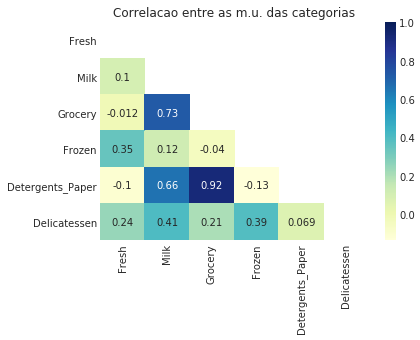

In [13]:
#Visão de correlação entre as m.u. das categorias
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask = mask, cmap='YlGnBu', annot=True, cbar=True)
plt.title('Correlacao entre as m.u. das categorias')

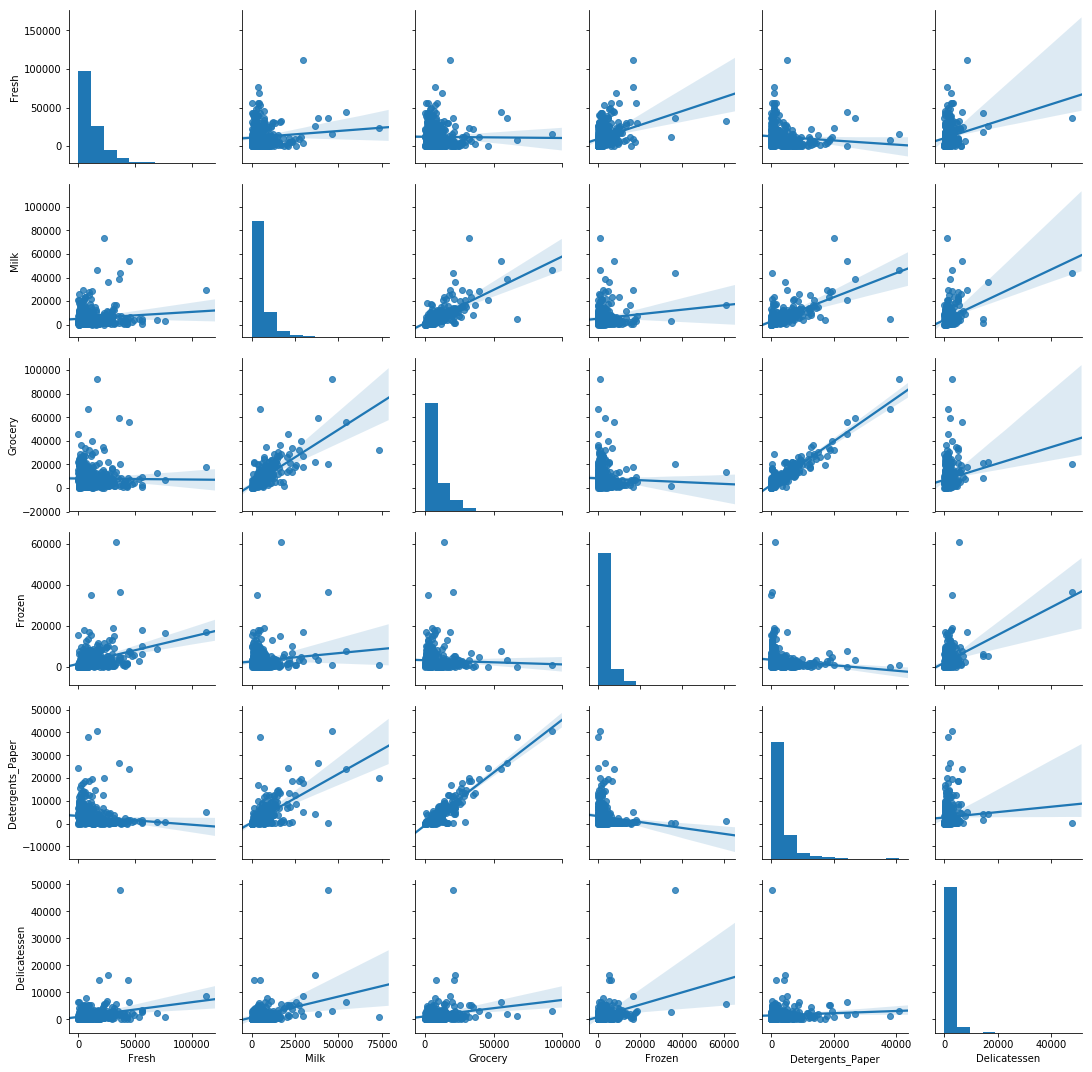

In [14]:
sns.pairplot(data, palette="husl", kind="reg");

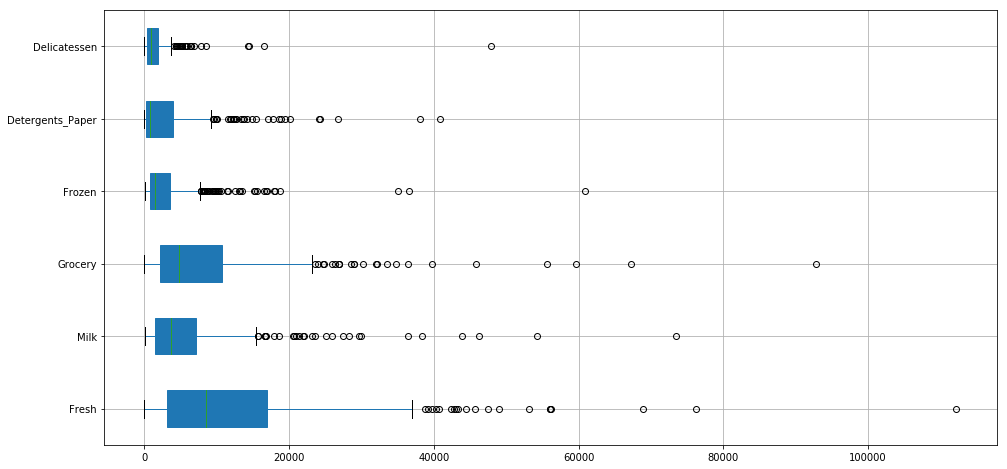

In [15]:
fig = plt.figure(figsize=(16,8))
data.boxplot(whis=1.5, patch_artist=True, vert=False)

**Resposta:**
<font style="color:blue;">
    <p>
    As categorias Mercearia e Detergentes/Papeis mostram uma tendencia linear e é o par mais correlacionado do conjunto de dados com 0,92 de coeficiente.
    </p>
    <p>
    Existe outras duas correlações moderadas, mas elas são bastante enviesadas. Os Laticínios se correlacionam bem com a Mercearia e com Detergentes/Papeis com respectivos coeficiente de 0,73 e 0,66.
    </p>
    <p>
    A categoria de Detergentes/Papeis também tem uma boa tendencia e se correlaciona bem com Laticínios e Mercearia, portanto tem pouca relevância diante do conjunto de dados para identificar os hábitos dos consumidores. Essa categoria era um dos meus palpites que influenciava, mas o modelo tinha falhado, era somente um palpite mal esclarecido. 
    </p>
    <p>
    Como resultado, a média é maior que a mediana. Os boxplots estão enviesados à direita.
    </p>
    <p>
    A distribuição da base de dados está enviesada positivamente, à direita. A distribuição tem poucos valores aberrantes, tendo em vista que a concentração deles é próxima de zero e a quantidade de registros, é bom escalonar os atributos para fazer uma distribuição normal do conjunto de dados. Isso também vai diminuir a diferença entre a média e a mediana, pois está com um desvio muito grande. A média e a mediana são muito diferentes e estão a direita do topo, indicando uma distribuição inclinada positiva.
    </p>
</font>

## Pré-processamento de Dados
Nesta seção, você irá pré-processar os dados para criar uma melhor representação dos clientes ao executar um escalonamento dos dados e detectando os discrepantes. Pré-processar os dados é geralmente um passo fundamental para assegurar que os resultados obtidos na análise são importantes e significativos.

### Implementação: Escalonando Atributos
Se os dados não são distribuídos normalmente, especialmente se a média e a mediana variam significativamente (indicando um grande desvio), é quase sempre [apropriado] ](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) aplicar um escalonamento não linear – particularmente para dados financeiros. Uma maneira de conseguir escalonar dessa forma é utilizando o [ teste Box-Cox](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), que calcula o melhor poder de transformação dos dados, que reduzem o desvio. Uma abordagem simplificada que pode funcionar na maioria dos casos seria aplicar o algoritmo natural.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribua uma cópia dos dados para o `log_data` depois de aplicar um algoritmo de escalonamento. Utilize a função `np.log` para isso.
 - Atribua uma cópia da amostra do dados para o `log_samples` depois de aplicar um algoritmo de escalonamento. Novamente, utilize o `np.log`.

/Users/alessandremartins/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


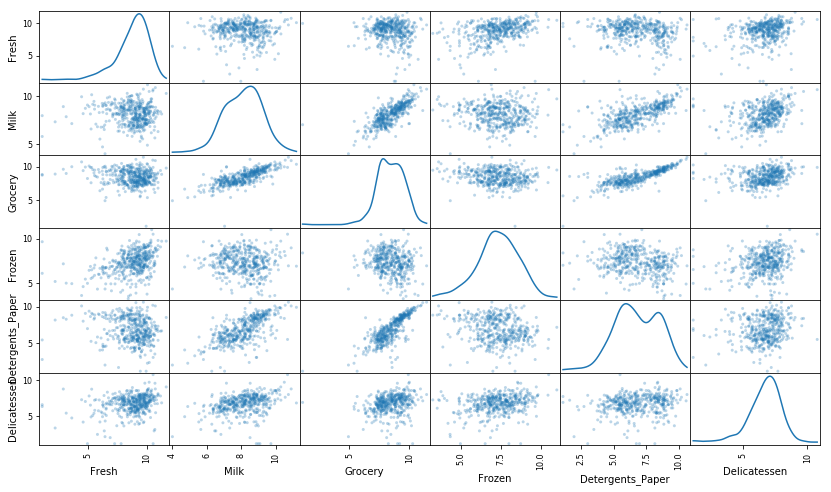

In [16]:
# TODO: Escalone os dados utilizando o algoritmo natural 
log_data = np.log(data)

# TODO: Escalone a amostra de dados utilizando o algoritmo natural
log_samples = np.log(samples)

# Produza uma matriz de dispersão para cada par de atributos novos-transformados
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Text(0.5,1,'Novo visao de correlacao entre as m.u. das categorias')

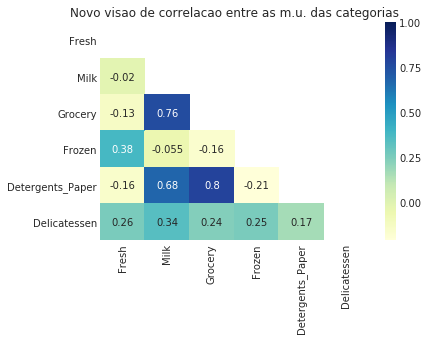

In [17]:
#Visão de correlação entre as m.u. das categorias depois da normalização
corr = log_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask = mask, cmap='YlGnBu', annot=True, cbar=True)
plt.title('Novo visao de correlacao entre as m.u. das categorias')

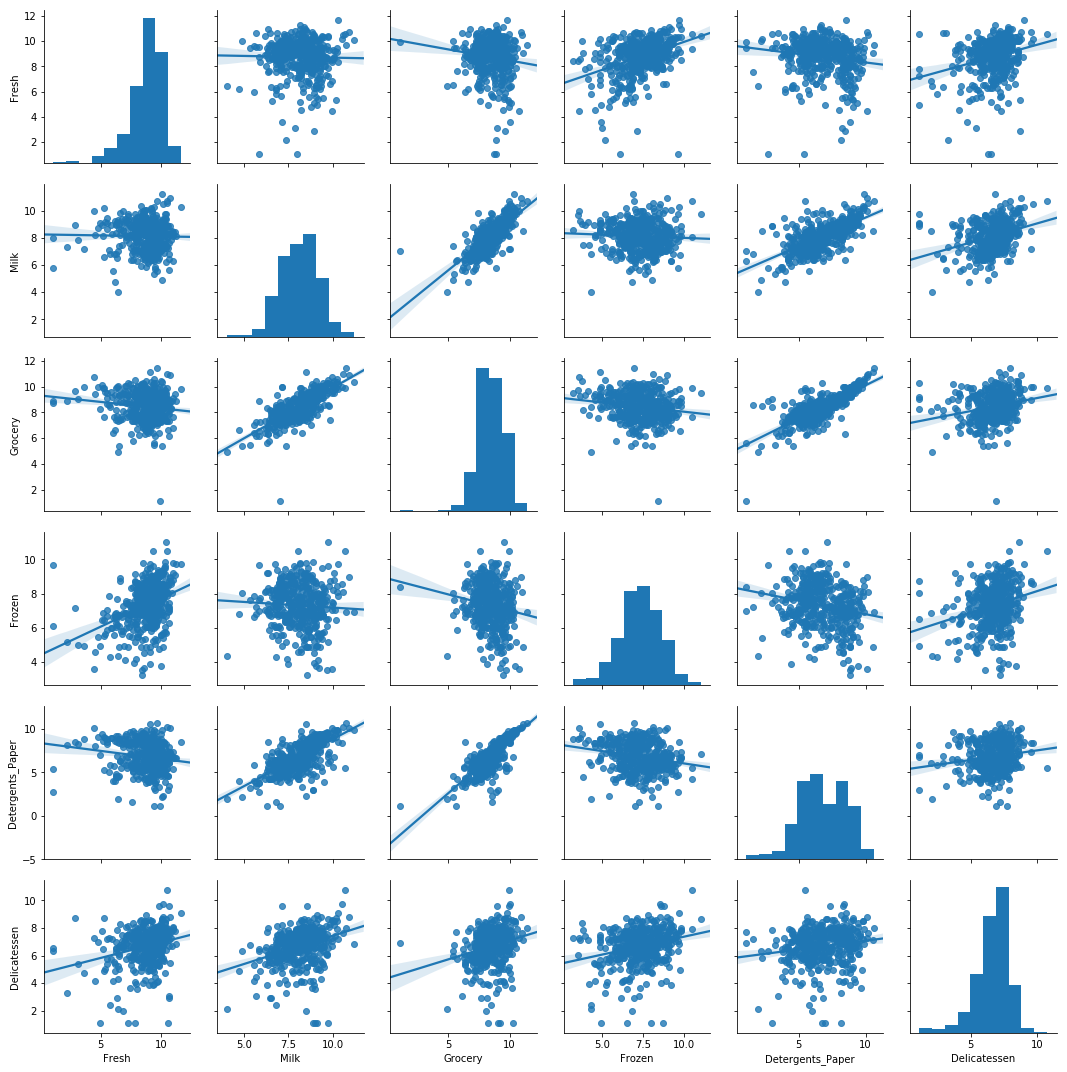

In [18]:
sns.pairplot(log_data, palette="husl", kind="reg");

### Observação
Após aplicar o algoritmo natural para o escalonamento dos dados, a distribuição para cada atributo deve parecer mais normalizado. Para muitos pares de atributos, você vai precisar identificar anteriormente como sendo correlacionados, observe aqui se essa correlação ainda está presente (e se está mais forte ou mais fraca que antes).

Execute o código abaixo para ver como a amostra de dados mudou depois do algoritmo natural ter sido aplicado a ela.

In [19]:
# Mostre a amostra dados log-transformada
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
1,11.241602,8.152774,8.868132,9.713416,6.656727,6.822197
2,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128


Text(0.5,1,'Nova Visao da Amostra')

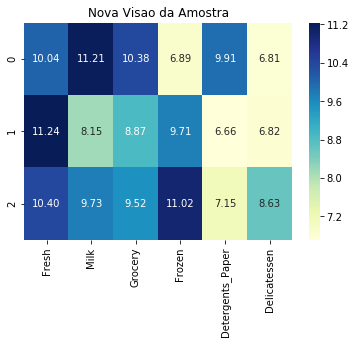

In [20]:
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(log_samples, cmap = 'YlGnBu', annot = True, fmt = ".2f", cbar = True, robust = bool)
plt.title('Nova Visao da Amostra')

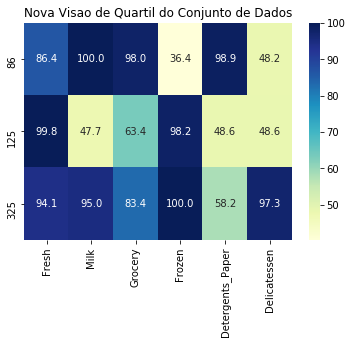

In [21]:
plt.title('Nova Visao de Quartil do Conjunto de Dados')
quartil = 100 * log_data.rank(axis = 0, pct = True).iloc[indices].round(decimals = 3)
sns.heatmap(quartil, annot = True, cmap = 'YlGnBu', fmt = '.1f', robust = bool)

### Implementação: Detecção de valores atípicos (_Outlier_)
Identificar dados discrepantes é extremamente importante no passo de pré-processamento de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos [o Método Turco para identificar valores atípicos](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo do discrepante* é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir o valor do 25º percentil do atributo dado para o `Q1`. Utilizar `np.percentile` para isso.
 - Atribuir o valor do 75º percentil do atributo dado para o `Q3`. Novamente, utilizar `np.percentile`.
 - Atribuir o cálculo de um passo do discrepante do atributo dado para o `step`.
 - Remover opcionalmentos os pontos de dados do conjunto de dados ao adicionar índices à lista de `outliers`.

**NOTA:** Se você escolheu remover qualquer discrepante, tenha certeza que a amostra de dados não contém nenhum desses pontos!  
 Uma vez que você executou essa implementação, o conjunto de dado será armazenado na variável `good_data`!

In [22]:
# Lista das outliers
outliers = []

# Para cada atributo encontre os pontos de dados com máximos valores altos e baixos
for feature in log_data.keys():
    
    # TODO: Calcule Q1 (25º percentil dos dados) para o atributo dado
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calcule Q3 (75º percentil dos dados) para o atributo dado
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Utilize a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
    step = 1.5 * (Q3 - Q1)
    #print "Outlier step:", step
    print('Passo do discrepante: {}'.format(step))
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    # Mostre os discrepantes
    print('{} Pontos de dados considerados discrepantes para o atributo {}:'.format(len(feature_outliers), feature))

    display(feature_outliers)
    
# OPCIONAL: Selecione os índices dos pontos de dados que você deseja remover
    outliers += feature_outliers.index.tolist()

# lista de outliers duplicados
duplicados = list(set([x for x in outliers if outliers.count(x) > 1]))    

# Remova os valores atí, caso nenhum tenha sido especificado
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

print('O conjunto de dados com valores discrepantes removidos tem {} amostras de dados.'.format(
    len(good_data))) # é bom traduzir
print('Foram identificados {} passos discrepantes, sendo que {} se repetiram, para fins de contas da amostra de dados acima.'.format(
    len(outliers), len(duplicados))) # é bom traduzir

Passo do discrepante: 2.533507868606793
16 Pontos de dados considerados discrepantes para o atributo Fresh:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Passo do discrepante: 2.318248272818475
4 Pontos de dados considerados discrepantes para o atributo Milk:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Passo do discrepante: 2.3988562137971394
2 Pontos de dados considerados discrepantes para o atributo Grocery:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Passo do discrepante: 2.3493275010092116
10 Pontos de dados considerados discrepantes para o atributo Frozen:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Passo do discrepante: 4.0893587609383335
2 Pontos de dados considerados discrepantes para o atributo Detergents_Paper:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Passo do discrepante: 2.2422806544219394
14 Pontos de dados considerados discrepantes para o atributo Delicatessen:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


O conjunto de dados com valores discrepantes removidos tem 398 amostras de dados.
Foram identificados 48 passos discrepantes, sendo que 5 se repetiram, para fins de contas da amostra de dados acima.


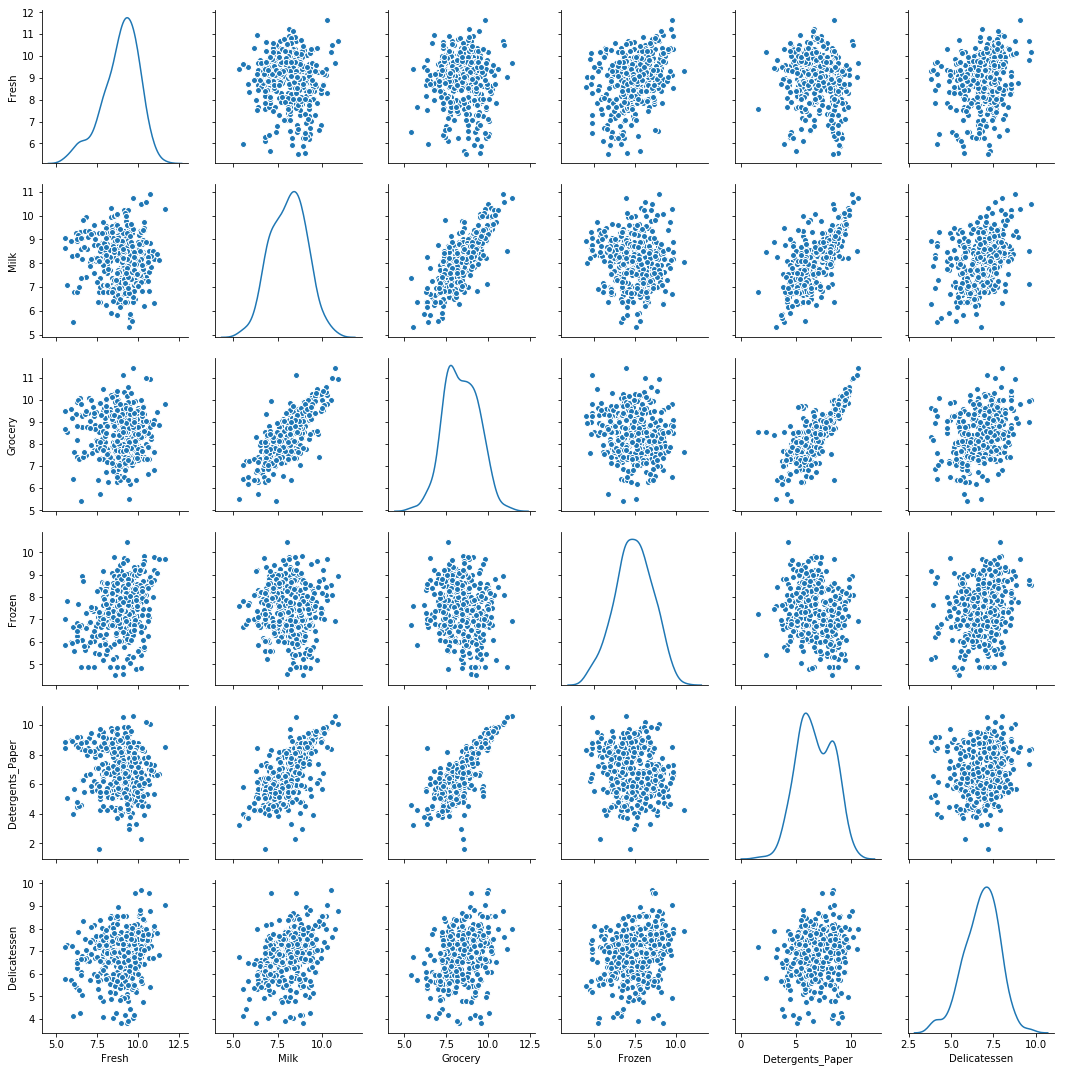

In [23]:
sns.pairplot(good_data, palette="husl", diag_kind="kde");

In [24]:
good_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,8.933438,8.121251,8.418637,7.429215,6.787511,6.801190
std,1.116110,1.007751,1.011809,1.129943,1.610957,1.029976
min,5.541264,5.303305,5.407172,4.510860,1.609438,3.828641
25%,8.304866,7.376038,7.661527,6.721426,5.573103,6.105339
50%,9.116895,8.191878,8.427922,7.455588,6.669498,6.905249
75%,9.739143,8.825039,9.186270,8.228172,8.205335,7.512071
max,11.627601,10.901524,11.437986,10.463360,10.617099,9.712509


### Questão 4
- Há alguns pontos de dado considerados discrepantes de mais de um atributo baseado na definição acima?
- Esses pontos de dados deveriam ser removidos do conjunto?
- Se qualquer ponto de dados foi adicionado na lista `outliers` para ser removido, explique por quê.

In [25]:
display(duplicados)

[128, 65, 66, 75, 154]

Text(0.5,1,'Mapa de correlacao entre as m.u. das categorias escalonadas')

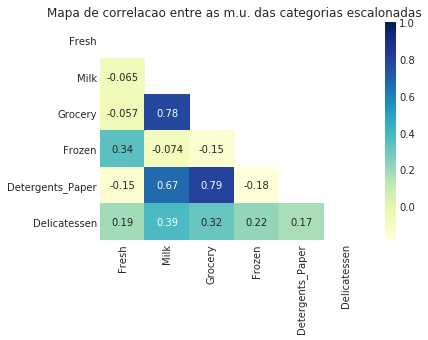

In [26]:
#Visão de correlação entre as m.u. das categorias dos dados escalonados
corr = good_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask = mask, cmap='YlGnBu', annot=True, cbar=True)
plt.title('Mapa de correlacao entre as m.u. das categorias escalonadas')

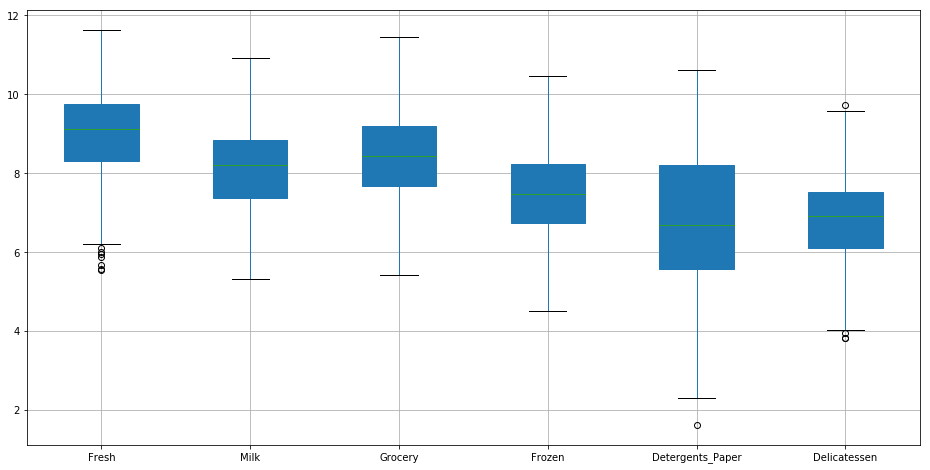

In [27]:
fig = plt.figure(figsize=(16,8))
good_data.boxplot(whis=1.5, patch_artist=True)

/Users/alessandremartins/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has

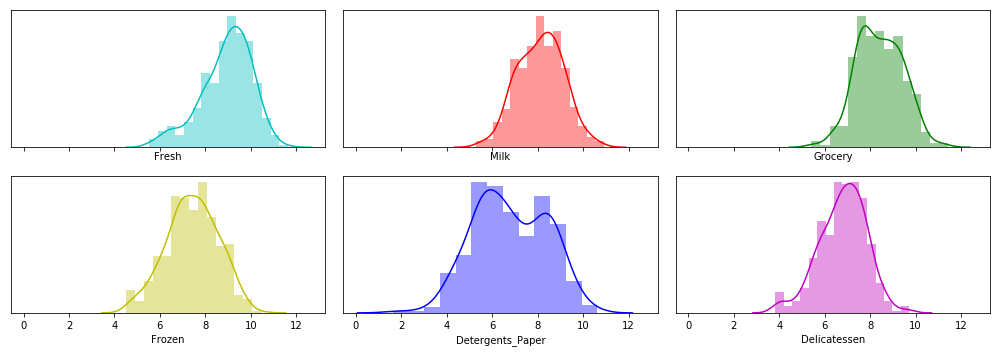

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(14, 5), sharex=True)
sns.distplot(good_data['Fresh'],ax=axes[0,0], color="c")
sns.distplot(good_data['Milk'],ax=axes[0,1], color="r")
sns.distplot(good_data['Grocery'],ax=axes[0,2], color="g")
sns.distplot(good_data['Frozen'],ax=axes[1,0], color="y")
sns.distplot(good_data['Detergents_Paper'],ax=axes[1,1], color="b")
sns.distplot(good_data['Delicatessen'],ax=axes[1,2], color="m")
plt.setp(axes, yticks=[])
plt.tight_layout()

**Resposta:**
<font style="color:blue;">
    <p>
    Temos 5 pontos duplamente discrepantes: 128, 65, 66, 75, 154.
    </p>
    <p>
    A correlação entre as categorias com os outliers e sem os outliers tem resultados semelhantes, e houve uma diferença em remove-los, mesmo os outliers sendo moderados. Depois que os atributos foram escalonados, a amplitude entre a média e a mediana ficou muito pequena se comparação com os originais. O desvio padrão também ficou pequeno como podemos ver no distplot. Os quartis também ficaram muito próximos. Isso pode ser reflexo dos diferentes níveis dos clientes. Optei por remover os discrepantes, acredito que o vies que eles causam pode mudar as suposições. Dois dos outliers fazem parte da amostra que escolhi, o 86 e o 325, portando esses dois foram removidos. Considerando os outliers uma manifestação natural da variabilidade entre os clientes.
    </p>
    <p>
    Os pontos de dados foram inclusos na lista de outliers por serem considerados anormais. Segundo o método usado, esses pontos de dados ficaram um passo alem da variação interquartil.
    </p>
</font>

## Transformação de Atributo
Nesta seção, você irá utilizar a análise de componentes principais (PCA) para elaborar conclusões sobre a estrutura subjacente de dados de clientes do atacado. Dado que ao utilizar a PCA em conjunto de dados calcula as dimensões que melhor maximizam a variância, nós iremos encontrar quais combinações de componentes de atributos melhor descrevem os consumidores.

### Implementação: PCA

Agora que os dados foram escalonados em uma distribuição normal e qualquer discrepante necessário foi removido, podemos aplicar a PCA na `good_data` para descobrir qual dimensão dos dados melhor maximizam a variância dos atributos envolvidos. Além de descobrir essas dimensões, a PCA também irá reportar a *razão da variância explicada* de cada dimensão – quanta variância dentro dos dados é explicada pela dimensão sozinha. Note que o componente (dimensão) da PCA pode ser considerado como um novo "feature" do espaço, entretanto, ele é uma composição do atributo original presente nos dados.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Importar o `sklearn.decomposition.PCA` e atribuir os resultados de ajuste da PCA em seis dimensões com o `good_data` para o `pca`.
 - Aplicar a transformação da PCA na amostra de log-data `log_samples` utilizando `pca.transform`, e atribuir os resultados para o `pca_samples`.

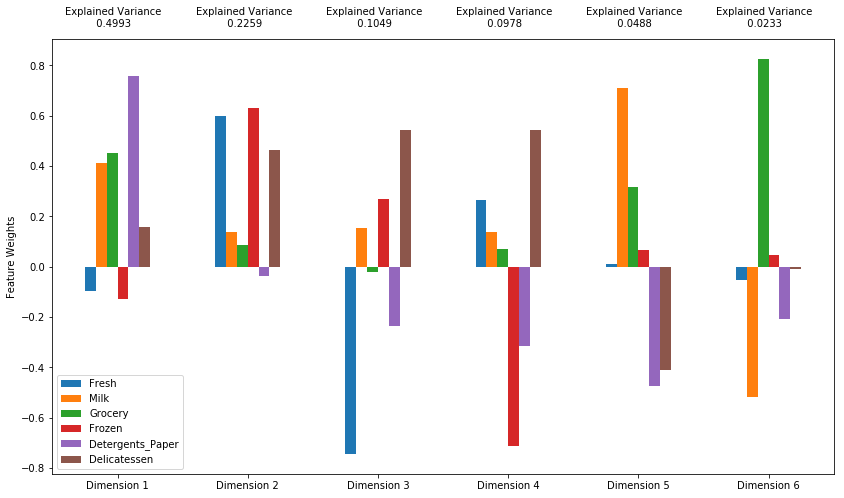

In [29]:
# from sklearn.decomposition import PCA
# TODO: Aplique a PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
pca = PCA(n_components=6).fit(good_data)

# TODO: Transforme a amostra de data-log utilizando o ajuste da PCA acima
pca_samples = pca.transform(log_samples)

# Gere o plot dos resultados da PCA
pca_results = vs.pca_results(good_data, pca)

Text(0.5,0,'Dimensoes')

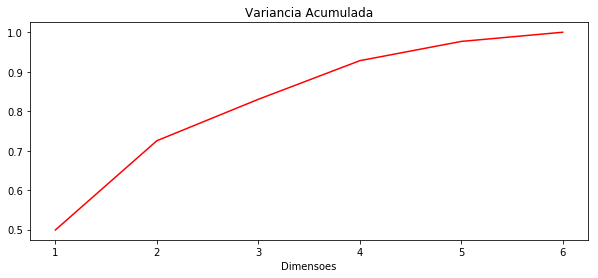

In [30]:
plt.figure(figsize=(10, 4))
plt.plot(np.arange(1, 7), np.cumsum(pca.explained_variance_ratio_), color='r')
plt.title('Variancia Acumulada')
plt.xlabel('Dimensoes')

In [31]:
# total de variância das duas primeiras dimençoes
display(pca_results['Explained Variance'][:2].sum())

0.7252000000000001

In [32]:
# total de variância das quatro primeiras dimençoes
display(pca_results['Explained Variance'][:3].sum())

0.8301000000000001

In [33]:
# total de variância das quatro primeiras dimençoes
display(pca_results['Explained Variance'][:4].sum())

0.9279000000000001

In [34]:
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.6300,-0.0376,0.4634
Dimension 3,0.1049,-0.7452,0.1544,-0.0204,0.2670,-0.2349,0.5422
Dimension 4,0.0978,0.2667,0.1375,0.0710,-0.7133,-0.3157,0.5445
Dimension 5,0.0488,0.0114,0.7083,0.3168,0.0671,-0.4729,-0.4120
Dimension 6,0.0233,-0.0543,-0.5177,0.8267,0.0471,-0.2080,-0.0094


Text(0.5,1,'Correlacao Dimensao & Categoria')

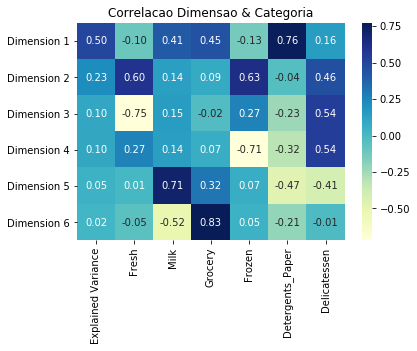

In [35]:
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(pca_results, cmap = 'YlGnBu', annot = True, fmt = ".2f", cbar = True, robust = bool)
plt.title('Correlacao Dimensao & Categoria')

### Questão 5
- Quanta variância nos dados é explicada **no total** pelo primeiro e segundo componente principal?
- Quanta variância nos dados é explicada pelos quatro primeiros componentes principais?
- Utilizando a visualização fornecida acima, discuta quais das quatro primeiras dimensões que melhor representam em termos de despesas dos clientes. Explique qual das quatro representa melhor em termos de consumo dos clientes.

**Dica:** Uma melhora positiva dentro de uma dimensão específica corresponde a uma *melhora* do atributos de *pesos-positivos* e uma *piora* dos atributos de *pesos-negativos*. A razão de melhora ou piora é baseada nos pesos de atributos individuais.

**Resposta:**
<font style="color:blue;">
    <p>
        A Dimensão 1 aumenta somente com um atributo. Essa dimensão se correlaciona muito bem com Detergentes/Papeis em seguida(mas não muito) com Mercearia e Laticínios. Dá para entender que tem muita preocupação com limpeza e higiene. Somente ela explica 0,49 da variância dentro do conjunto de dados. A Dimensão 2 é fortemente correlacionado com dois atributos: Congelados e Frescos. Se Congelados aumenta os Frescos também irão aumentar. Posso dizer com base nessa correlação que são restaurantes. A variância das duas dimensões acumulou em 0,725.</p>
    <p>
        Nas dimensões 3 e 4 a variância acumulada é de 0,927. A dimensão 3 e 4 são bem correlacionadas com Delicatessen.</p>
    <p>
        No plot de Variância Acumulada a partir da dimensão 2 a curva é menos acentuada se mantendo até a dimensão 4. Escolho a dimensão 3, entre as curvas menos acentuadas, como quem maximiza melhor a variância dos atributos, ela representar 83% em termos de consumo dos clientes 
    </p>
</font>

### Observação
Execute o código abaixo para ver como a amostra de log transformado mudou depois de receber a transformação da PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [36]:
# Exiba a amostra de log-data depois de aplicada a tranformação da PCA
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,4.4809,0.8020,-1.2612,0.2571,1.3043,-0.7119
1,-0.3980,2.8829,-1.0725,-0.9247,0.3976,0.3645
2,1.1180,4.2872,1.0017,-0.9866,0.8195,0.0756


### Implementação: Redução da Dimensionalidade
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a *taxa de variância explicada cumulativa* é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser visualizados depois.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir os resultados de ajuste da PCA em duas dimensões com o `good_data` para o `pca`.
 - Atribuir a tranformação da PCA do `good_data` utilizando `pca.transform`, e atribuir os resultados para `reduced_data`.
 - Aplicar a transformação da PCA da amostra do log-data `log_samples` utilizando `pca.transform`, e atribuindo os resultados ao `pca_samples`.

In [37]:
# TODO: Aplique o PCA ao ajusta os bons dados com apenas duas dimensões
pca = PCA(n_components=2).fit(good_data)

# TODO: Transforme os bons dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(good_data)

# TODO: Transforme a amostre de log-data utilizando o ajuste de PCA acima
pca_samples = pca.transform(log_samples)

# Crie o DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.128,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.630,-0.0376,0.4634


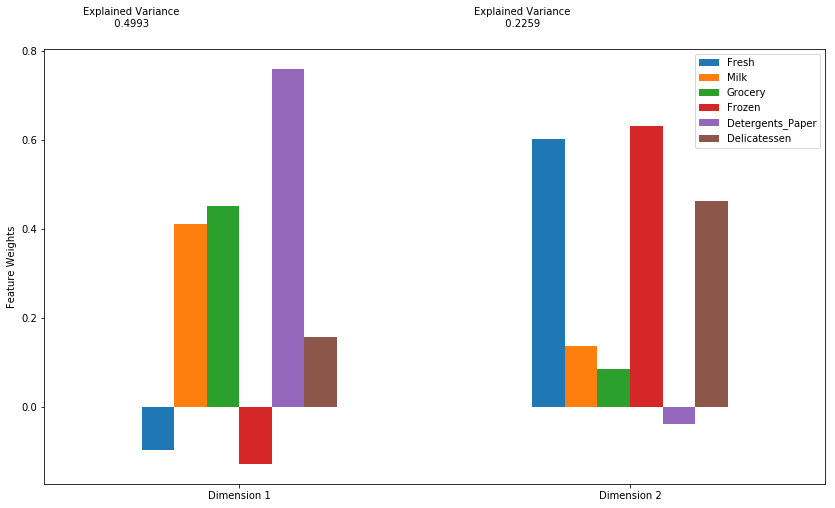

In [38]:
display(vs.pca_results(good_data, pca))

### Observação
Execute o código abaixo para ver como a amostra de dados do log-transformado mudou depois de receber a transformação do PCA aplicada a ele em apenas duas dimensões. Observe como os valores das duas primeiras dimensões permanessem constantes quando comparados com a transformação do PCA em seis dimensões.

In [39]:
# Exiba a amostra de log-data depois de aplicada a transformação da PCA em duas dimensões
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,4.4809,0.8020
1,-0.3980,2.8829
2,1.1180,4.2872


## Visualizando um Biplot
Um biplot é um gráfico de dispersão onde cada ponto é representado por sua pontuação junto das componentes principais. Os eixos são as componentes principais (nesse caso, `Dimension 1` e `Dimenson 2`). Além disso, o biplot mostra a projeção dos atributos originais junto das componentes. Um biplot pode nos ajudar a interpretar a redução da dimensionalidade dos dados e descobrir relacionamentos entre as componentes principais e os atributos originais.

Execute a célula abaixo para produzir um biplot com os dados de dimensionalidade reduzida.

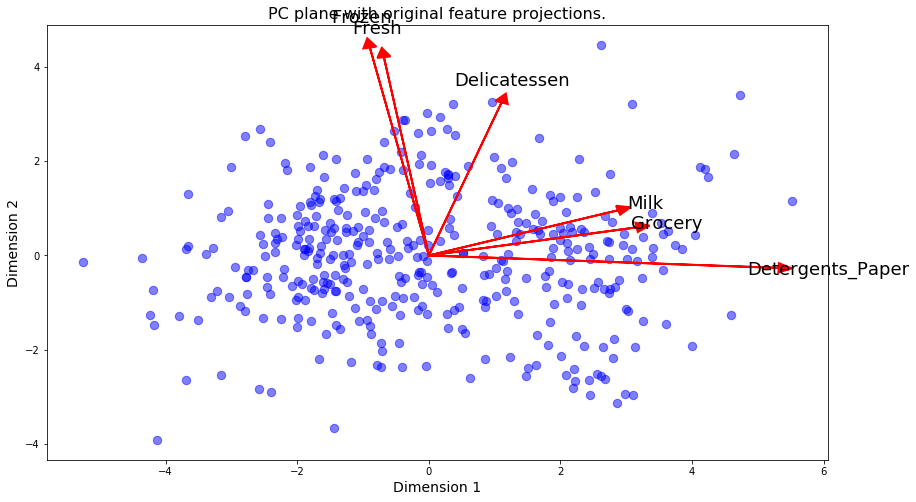

In [40]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

## Clustering

Nesta seção, você irá escolher utilizar entre o algoritmo de clustering K-Means ou o algoritmo de clustering do Modelo de Mistura Gaussiano para identificar as várias segmentações de clientes escondidos nos dados. Então você irá recuperar pontos de dados específicos do cluster para entender seus significados ao transformá-los de volta em suas dimensões e escalas originais. 

### Questão 6
- Quais são as vantagens de utilizar o algoritmo de clustering K-Means?
- Quais são as vantagens de utilizar o algoritmo de clustering do Modelo de Mistura Gaussiano?
- Dadas as suas observações até agora sobre os dados de clientes da distribuidora, qual dos dois algoritmos você irá utilizar e por quê.

**Dica: **Pense na diferença entre os clusters mais próximos ou mais isolados.

**Resposta:**

<font style="color:blue;">
    <p>
        Abaixo implementei um gráfico Coeficiênte GMM & K-means plotando os coeficientes dos dois algoritmos.
    </p>
    <p>
        Fiz a implementação dos dois, pois são fáceis. Mas escolho K-means por ter maiores vantagens e menores desvantagens, como listei abaixo:
    </p>
    <p>
        <strong>Vantagem do agrupamento K-means</strong>
    </p>
<ul>
    <li>Fácil de implementar</li>
    <li>Computacionamente rapido</li>
    <li>Agrupamento mais refinado, pois dados no mesmo cluster têm uma distância menor que os dados que estão em outros cluster.</li>
    <li>Minimiza a distância entre os dados no mesmo cluster.</li>
    <li>Mais eficiente segundo o grafico.</li>
    <li>Por calcular a medias dos pontos para um determinado cluster, o custo computacional é baixo para a distância de cada ponto.</li>
</ul>
    <p>
        <strong>Desvantagem do clustering K-means</strong>
    </p>
<ul>
    <li>A distância entre os pontos não é eficiente para outlier.</li>
    <li>Rígido, um ponto de dados pertence a um cluster especifico.</li>
</ul>
    <p>
        <strong>Vantagem do agrupamento GMM</strong>
    </p>
<ul>
    <li>Fácil de implementar</li>
    <li>Encontrar parâmetros que maximizem as probabilidades.</li>
    <li>Flexível. Os pontos de dados podem ser atribuídos a vários clusters de uma só vez, dada uma certa probabilidade.</li>
</ul>
    <p>
        <strong>Desvantagem do agrupamento GMM</strong>
    </p>
<ul>    
    <li>Menos eficiente segundo o grafico.</li>
    <li>Difícil estimar valores para os diferentes parâmetros do modelo.</li>
    <li>Computacionamente, não é tão rápido quanto K-means, mas mantem uma boa velocidade.</li>
    <li>Como fornece uma serie de probabilidades, o custo computacional é alto para a distância de cada ponto.</li>
</ul>
    <p>
        Escolho K-means por ter custo computacional mais baixo, é mais rápido e mais eficiente para esse conjunto de dados. O K-means distingue rigidamente os limites de um cluster do outro. O K-means não diverge os locais dos pontos, dimensionando bem o conjunto de dados. O algoritmo tem o custo de execução mais baixo que o GMM, para extração dos clusters o algoritimo calcula somente a média dos pontos atribuídos a um cluster.
    </p>
</font>

### Implementação: Criando Clusters
Dependendo do problema, o número de clusters que você espera que estejam nos dados podem já ser conhecidos. Quando um número de clusters não é conhecido *a priori*, não há garantia que um dado número de clusters melhor segmenta os dados, já que não é claro quais estruturas existem nos dados – se existem. Entretanto, podemos quantificar a "eficiência" de um clustering ao calcular o *coeficiente de silhueta* de cada ponto de dados. O [coeficiente de silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) para um ponto de dado mede quão similar ele é do seu cluster atribuído, de -1 (não similar) a 1 (similar). Calcular a *média* do coeficiente de silhueta fornece um método de pontuação simples de um dado clustering.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Ajustar um algoritmo de clustering para o `reduced_data` e atribui-lo ao `clusterer`.
 - Prever o cluster para cada ponto de dado no `reduced_data` utilizando o `clusterer.predict` e atribuindo eles ao `preds`.
 - Encontrar os centros do cluster utilizando o atributo respectivo do algoritmo e atribuindo eles ao `centers`.
 - Prever o cluster para cada amostra de pontos de dado no `pca_samples` e atribuindo eles ao `sample_preds`.
 - Importar sklearn.metrics.silhouette_score e calcular o coeficiente de silhueta do `reduced_data` contra o do `preds`.
   - Atribuir o coeficiente de silhueta para o `score` e imprimir o resultado.

In [41]:
sGMM = []
sKMeans = []
n_clusters = []
    
for components in range(10,1,-1):
    
    # TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
    clustererGMM = GMM(n_components=components, random_state=1).fit(reduced_data)
    clustererKMeans = KMeans(n_clusters=components, random_state=1).fit(reduced_data)
    
    # TODO: Preveja o cluster para cada ponto de dado
    predsGMM = clustererGMM.predict(reduced_data)
    predsKMeans = clustererKMeans.predict(reduced_data)

    # TODO: Ache os centros do cluster
    centersGMM = clustererGMM.means_
    centersKMeans = clustererKMeans.cluster_centers_

    # TODO: Preveja o cluster para cada amostra de pontos de dado transformados
    sample_predsGMM = clustererGMM.predict(pca_samples)
    sample_predsKMeans = clustererKMeans.predict(pca_samples)
    
    # TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
    scoreGMM = silhouette_score(reduced_data, predsGMM)
    scoreKMeans = silhouette_score(reduced_data, predsKMeans)
    
    sGMM.append(scoreGMM)
    sKMeans.append(scoreKMeans)
    n_clusters.append(components)

/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/pyth

/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/pyth

/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandr

/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/python3.6/s

/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alessandremartins/anaconda/lib/python3.6/site-packages/sklearn/utils

In [42]:
comp_scores = pd.DataFrame(
    {'Score GMM': sGMM,
     'Score KMeans': sKMeans
    }, index=n_clusters)
comp_scores.sort_index(ascending=True)

,Score GMM,Score KMeans
2,0.443601,0.447158
3,0.357295,0.363986
4,0.291646,0.331151
5,0.263136,0.351333
6,0.311042,0.363650
7,0.298799,0.355837
8,0.294627,0.377933
9,0.307903,0.367516
10,0.251895,0.333163


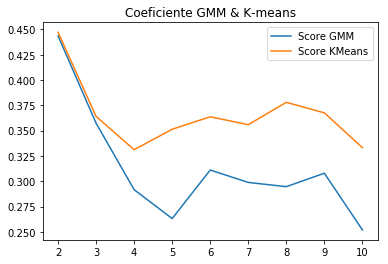

In [43]:
comp_scores.plot(title='Coeficiente GMM & K-means')

### Questão 7
- Reporte o coeficiente de silhueta para vários números de cluster que você tentou.
- Dentre eles, qual a quantidade de clusters que tem a melhor pontuação de silhueta?

**Resposta:**
<font style="color:blue;">
    Para essa tarefa escolhi fala do algoritmo K-means. O melhor coeficiente foi para 2 clusters ficando: <strong>2 clusters = 0.447</strong>, 3 clusters = 0.363, 4 clusters = 0.331, 5 clusters = 0.351, 6 clusters = 363, 7 clusters = 0.355, 8 clusters = 0.377, 9 clusters = 0.367 e 10  clusters = 0.333.
</font>

### Visualização de Cluster
Uma vez que você escolheu o número ótimo de clusters para seu algoritmo de clustering utilizando o método de pontuação acima, agora você pode visualizar os resultados ao executar o bloco de código abaixo. Note que, para propósitos de experimentação, é de bom tom que você ajuste o número de clusters para o seu algoritmo de cluster para ver várias visualizações. A visualização final fornecida deve, entretanto, corresponder com o número ótimo de clusters. 

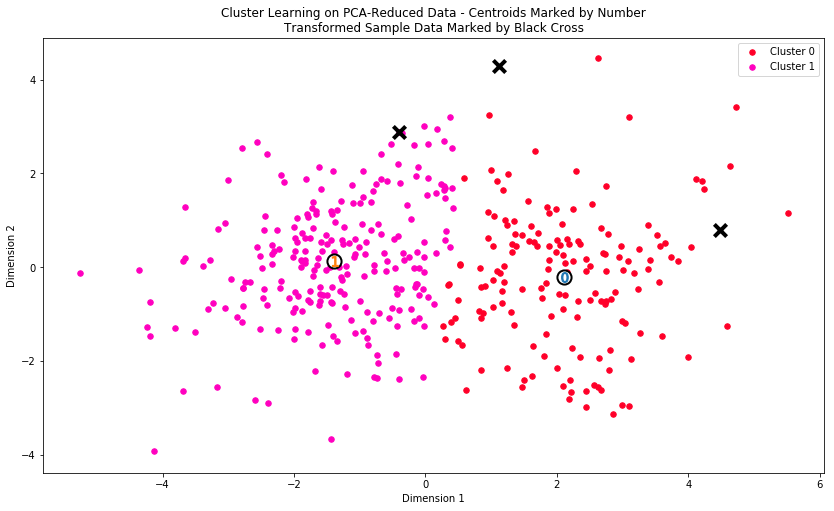

In [44]:
# Mostre os resultados do clustering da implementação
vs.cluster_results(reduced_data, predsKMeans, centersKMeans, pca_samples)

### Implementação: Recuperação de Dados
Cada cluster apresentado na visualização acima tem um ponto central. Esses centros (ou médias) não são especificamente pontos de dados não específicos dos dados, em vez disso, são *as médias* de todos os pontos estimados em seus respectivos clusters. Para o problema de criar segmentações de clientes, o ponto central do cluster corresponde *a média dos clientes daquele segmento*. Já que os dados foram atualmente reduzidos em dimensões e escalas por um algoritmo, nós podemos recuperar a despesa representativa do cliente desses pontos de dados ao aplicar transformações inversas.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Aplicar a transformação inversa para o `centers` utilizando o `pca.inverse_transform`, e atribuir novos centros para o `log_centers`.
 - Aplicar a função inversa do `np.log` para o `log_centers` utilizando `np.exp`, e atribuir os verdadeiros centros para o `true_centers`.


In [45]:
# TODO: Transforme inversamento os centros
log_centers = pca.inverse_transform(centersKMeans)

# TODO: Exponencie os centros
true_centers = np.exp(log_centers)

# Mostre os verdadeiros centros
segments = ['Segment {}'.format(i) for i in range(0,len(centersKMeans))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0
Segment 1,9451.0,1938.0,2449.0,2200.0,307.0,771.0


In [46]:
# TODO: Transforme inversamento os centros
log_centers = pca.inverse_transform(centersKMeans)

In [47]:
pd.DataFrame(log_centers)

,0,1,2,3,4,5
0,8.598625,8.959354,9.352869,7.023843,8.399200,7.035147
1,9.153856,7.569499,7.803600,7.696084,5.726482,6.647169


In [48]:
# TODO: Exponencie os centros
true_centers = np.exp(log_centers)

In [49]:
pd.DataFrame(true_centers)

,0,1,2,3,4,5
0,5424.197782,7780.327993,11531.860894,1123.094808,4443.510732,1135.862220
1,9450.813989,1938.169655,2449.404399,2199.717978,306.887854,770.599337


In [50]:
# Mostre os verdadeiros centros
segments = ['Segment {}'.format(i) for i in range(0,len(centersKMeans))]

In [51]:
segments

['Segment 0', 'Segment 1']

In [52]:
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())

In [53]:
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0
1,9451.0,1938.0,2449.0,2200.0,307.0,771.0


In [54]:
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0
Segment 1,9451.0,1938.0,2449.0,2200.0,307.0,771.0


In [55]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Questão 8
- Considere o gasto total de compra de cada categoria de produto para os pontos de dados representativos acima e reporte a descrição estatística do conjunto de dados no começo do projeto. Qual conjunto de estabelecimentos cada segmentação de clientes representa?

**Dica:** Um cliente que é atribuído ao `'Cluster X'` deve se identificar melhor com os estabelecimentos representados pelo conjunto de atributos do `'Segment X'`. Pense no que cada segmento representa em termos do ponto de atributo escolhido.

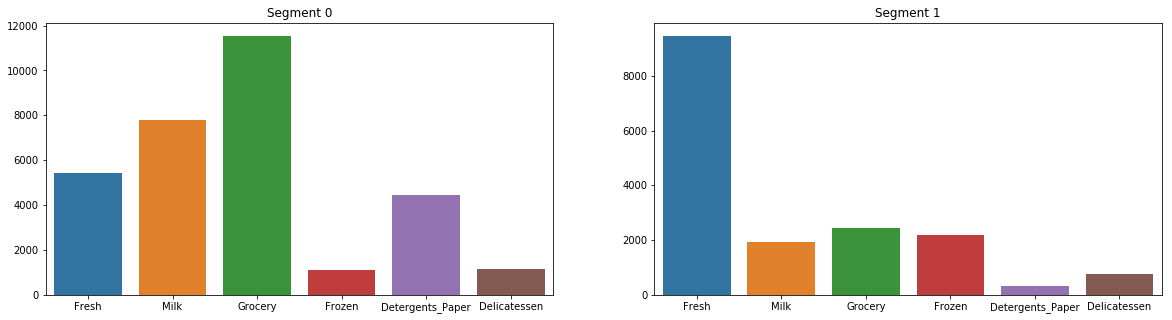

In [56]:
fig, (x1, x2) = plt.subplots(1, 2, figsize=(20, 5), sharex = True)
x1.set_title('Segment 0')
sns.barplot(x = true_centers.columns.values, y = true_centers.iloc[0].values, ax = x1)
x2.set_title('Segment 1')
sns.barplot(x = true_centers.columns.values, y = true_centers.iloc[1].values, ax = x2)

**Resposta:**
<font style="color:blue;">
    <p>
    Considerando os custos totais de cada categoria, os clusters representam dois grupos com hábitos de compra, um que compra muito em produtos de Mercearia e outro em produtos Frescos.</p>
    <p>
    Segment 0: Sugiro que representa supermercados e lojas varejistas pois tem alta tendencia para comprar produtos de Mercearia e Laticínios seguidos de produtos Frescos.</p>
    <p>
    Segment 1: Acredito que sejam restaurantes em geral(podem está em shoppings, hoteis, fabricas e outros) e economizando nas demais categorias.</p>
</font>

### Questão 9
- Para cada amostra de ponto, qual segmento de cliente da **Questão 8** é melhor representado?
- As previsões para cada amostra de ponto são consistentes com isso?

Execute o bloco de códigos abaixo para saber a previsão de segmento para cada amostra de ponto.

In [57]:
# Mostre as previsões
for i, pred in enumerate(sample_predsKMeans):
    print('Ponto de amostragem {} previsto para ser em Cluster {}'.format(i, pred))

Ponto de amostragem 0 previsto para ser em Cluster 0
Ponto de amostragem 1 previsto para ser em Cluster 1
Ponto de amostragem 2 previsto para ser em Cluster 0


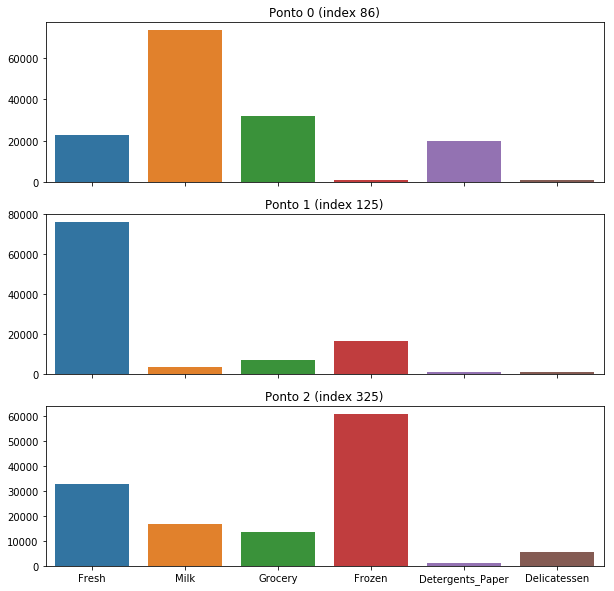

In [58]:
fig, (x1, x2, x3) = plt.subplots(3, 1, figsize=(10, 10), sharex = True)
x1.set_title('Ponto 0 (index 86)')
sns.barplot(x = samples.columns.values, y = samples.iloc[0].values, ax = x1)
x2.set_title('Ponto 1 (index 125)')
sns.barplot(x = samples.columns.values, y = samples.iloc[1].values, ax = x2)
x3.set_title('Ponto 2 (index 325)')
sns.barplot(x = samples.columns.values, y = samples.iloc[2].values, ax = x3)

**Resposta:**

<font style="color:blue;">
<p>O ponto 0 pertence ao seguimento 0, possivelmente um varejistas fortemente ligada a derivados derivados de leite.</p>
<p>O ponto 1 pertence ao seguimento 1, possivelmente um restaurante.</p>
<p>O ponto 2 pertence ao seguimento 0, possivelmente um supermercado.</p>
</font>

## Conclusão

Nesta seção final, você irá investigar maneiras de fazer uso dos dados que estão em clusters. Primeiro você vai considerar quais são os diferentes grupos de clientes, a **segmentação de clientes**, que pode ser afetada diferentemente por um esquema de entrega específico. Depois, você vai considerar como dar um rótulo para cada cliente (qual *segmento* aquele cliente pertence), podendo fornecer atributos adicionais sobre os dados do cliente. Por último, você vai comparar a **segmentação de clientes** com uma variável escondida nos dados, para ver se o cluster identificou certos tipos de relação.

### Questão 10
Empresas sempre irão executar os [testes A/B](https://en.wikipedia.org/wiki/A/B_testing) ao fazer pequenas mudanças em seus produtos ou serviços para determinar se ao fazer aquela mudança, ela afetará seus clientes de maneira positiva ou negativa. O distribuidor de atacado está considerando mudar seu serviço de entrega de atuais 5 dias por semana para 3 dias na semana. Mas o distribuidor apenas fará essa mudança no sistema de entrega para os clientes que reagirem positivamente.
- Como o distribuidor de atacado pode utilizar a segmentação de clientes para determinar quais clientes, se há algum, que serão alcançados positivamente à mudança no serviço de entrega?

**Dica:** Podemos supor que as mudanças afetam todos os clientes igualmente? Como podemos determinar quais grupos de clientes são os mais afetados?

**Resposta:**

<font style="color:blue;">
    <p>
        Temos dois grandes segmentos previstos pelo modelo que são referentes as categorias de produtos de Mercearia e o outro de produtos Frescos.</p>
    <p>
        O Seguimento 0 pode ser flexível com as entregas, pois a maioria dos seus produtos são de prazo de validade maior. Esses podem receber suas entregas 3 vezes por semana.</p>
    <p>
        Um fator criterioso para definir as entregas é que produtos fresco tem a qualidade vinculada ao tempo. Precisam ser entregues diariamente. Portanto, as entregas para os clientes do Segment 1 são obrigatoriamente diárias para manter um bom padrão de qualidade de seus produtos.</p>
    <p>
        Uma variável oculta é o horário de entrega. De maneira que os produtos frescos teriam que ser entregues antes dos horários de funcionamento dos clientes. Não faz sentido entregar alimento fresco no meio ou no fim do expediente, pois já não usariam a maior parte desses produtos no mesmo dia, gerando prejuízo ao cliente.</p>
    <p>
        Eu sou a favor de manter os testes A/B constantes nas operações de entrega e medir a satisfação pelo serviços para evitar qualquer tipo de coincidências que possam ocorrer. Isso nos dará informações mais confiáveis e ampliará nosso conjunto de dados. É possível que um dos segmentos de clientes tenha uma reação positiva e aceite melhor a mudança do serviço de entrega para 3 dias por semana. Portanto, observamos a satisfação dos clientes na troca do período de entrega em um determinado período de tempo para obtermos conclusões significativas sobre o impacto da troca do prazo de entrega.</p>
</font>

### Questão 11
A estrutura adicional é derivada dos dados não rotulados originalmente quando utilizado as técnicas de clustering. Dado que cada cliente tem um **segmento de cliente** que melhor se identifica (dependendo do algoritmo de clustering aplicado), podemos considerar os *segmentos de cliente* como um **atributo construído (engineered)** para os dados. Assumindo que o distribuidor de atacado adquiriu recentemente dez novos clientes e cada um deles forneceu estimativas dos gastos anuais para cada categoria de produto. Sabendo dessas estimativas, o distribuidor de atacado quer classificar cada novo cliente em uma **segmentação de clientes** para determinar o serviço de entrega mais apropriado.  
- Como o distribuidor de atacado pode rotular os novos clientes utilizando apenas a estimativa de despesas com produtos e os dados de **segmentação de clientes**.

**Dica:** Um aprendiz supervisionado pode ser utilizado para treinar os clientes originais. Qual seria a variável alvo?

**Resposta:**

<font style="color:blue;">
    <p>Como já temos do modelo que foram criadas no bloco de código de criação de clusters, em cada cliente novo eu aplico as predições no bloco de código que mostra as previsões. O bloco de previsões pode ser usado para prever o segmento de clientes para novos clientes, possibilitando a escolha do serviço de entrega mais apropriado.</p>
</font>

### Visualizando Distribuições Subjacentes

No começo deste projeto, foi discutido que os atributos `'Channel'` e `'Region'` seriam excluídos do conjunto de dados, então as categorias de produtos do cliente seriam enfatizadas na análise. Ao reintroduzir o atributo `'Channel'` ao conjunto de dados, uma estrutura interessante surge quando consideramos a mesma redução de dimensionalidade da PCA aplicada anteriormente no conjunto de dados original.

Execute o código abaixo para qual ponto de dados é rotulado como`'HoReCa'` (Hotel/Restaurante/Café) ou o espaço reduzido `'Retail'`. Al´´em disso, você vai encontrar as amostras de pontos circuladas no corpo, que identificará seu rótulo.

In [59]:
reduced_data.shape

(398, 2)

In [60]:
len(outliers)

48

In [61]:
pca_samples

array([[ 4.48089046,  0.80204306],
       [-0.39801137,  2.88290643],
       [ 1.11799527,  4.28717389]])

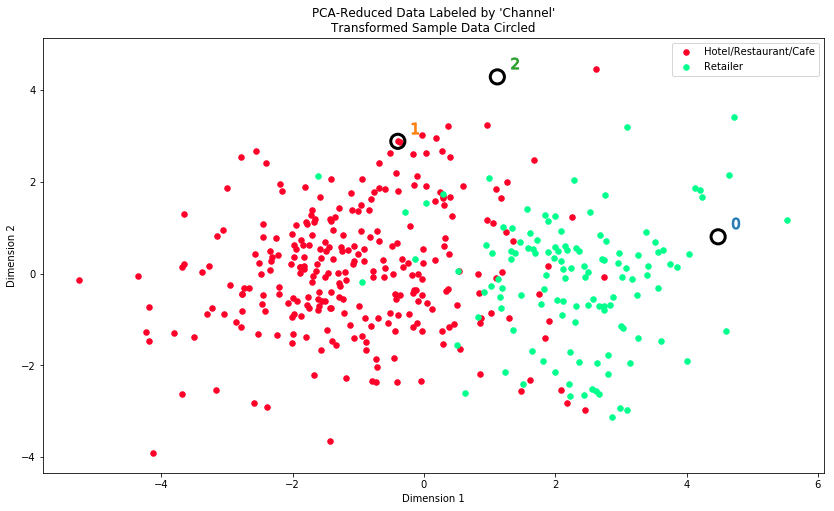

In [62]:
# Mostre os resultados do clustering baseado nos dados do 'Channel'
vs.channel_results(reduced_data, outliers, pca_samples)

### Questão 12
- Quão bom é o algoritmo de clustering e o números de clusters que você escolheu comparado a essa distribuição subjacente de clientes de Hotel/Restaurante/Café a um cliente Varejista?
- Há segmentos de clientes que podem ser classificados puramente como 'Varejistas' ou 'Hotéis/Restaurantes/Cafés' nessa distribuição?
- Você consideraria essas classificações como consistentes comparada a sua definição de segmentação de clientes anterior?*

**Resposta:**

<font style="color:blue;">
    <p>
        O gráfico separa de forma semelhante ao modelo os três círculos indicando os pontos da amostra que escolhi no inicio. Também podemos identificar que dois pontos não estão presentes (mesmo com os círculos marcados no gráfico). Foram removidos por serem outliers na questão 4, mudando os valores dos seus respectivos indices. A distribuição se relaciona bem com o clusters previstos no modelo qua utiliza algoritmos Kmeans.</p>
    <p>
        O ponto 1 afirma ser um restaurante, portanto confirma a previsão do modelo proposto, mostrando parcialmente que o algoritmo K-means foi bom na distribuição dos clientes.</p>
    <p>
        Nessa distribuição tem um grau de disparidade com o algoritmo K-means, mas podemos identificar clientes que são especificamente ‘Varejistas’ ou ‘Hotéis/Restaurantes/Cafés’.</p>
    <p>
        Considero essa classificação sólida comparada com a definição de clientes que obtive nas Questões anteriores.</p>
</font>

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando um iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima e navegando até  
**File -> Download as -> HTML (.html)**. Inclua o documento finalizado junto com esse Notebook para o seu envio.